In [1]:
from child import Child
import helper_functions
import sandia_stats
import time
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import phasing_functions
%matplotlib inline

In [2]:
# Step 0: Read config file
with open('phasing_config_file.txt', 'r') as f:
    config_elem = {}
    for line in f:
        line_split = line.strip().split('\t')
        #print(line_split)
        config_elem[line_split[0]] = line_split[1]

In [3]:
# Step 1: Obtain names from ped file
names = helper_functions.ped_file_reader(config_elem["PED_FILE"])

In [5]:
# Step 2: Read in the vcf file
df = helper_functions.read_VCF(config_elem["VCF_FILE"], names)

C:\Users\rodriguezah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
# Step 3: obtain only high quality SNPs
SNP_df = helper_functions.SNP_filter(df)

In [11]:
# Step 4: Create child object for proband
proband = Child(config_elem["PROBAND_NAME"], names[0], names[1])

In [13]:
# step 5: Generate results
start = time.time()
mosaicism_outcome = [phasing_functions.runner(proband, chr_name, int(config_elem["SAMPLE_SIZE"]), float(config_elem["T_THRES"]), SNP_df) for chr_name in range(1,23)]
end = time.time()
print(str((end-start)/60) + " minutes")

8.321074680487316 minutes


In [14]:
# step 6: write results to file
with open(config_elem["OUTPUT_FILE"], 'w') as output_file:
    output_file.write(" ".join(["Mosaicism results for", proband.name]))
    output_file.write("\n")
    output_file.write("\t".join(["chr_number", "VCF_start", "VCF_end"]))
    output_file.write("\n")
    for i, elem in enumerate(mosaicism_outcome):
        if elem is not None:
            output_file.write("\t".join([str(i + 1), str(elem[0]), str(elem[1])]))
            output_file.write("\n")

In [28]:
# Verify results 
proband.phasable_snp_determiner(helper_functions.chromosome_filter(SNP_df, 7))
proband.t_test_snps(samp_size=int(config_elem["SAMPLE_SIZE"]), t_thres=float(config_elem["T_THRES"]))


Mosaicism has been detected in child UDP18111 with approximated start and end points at VCF positions 148090906 and 159086440, respectively


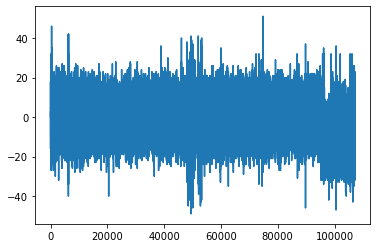

In [29]:
diff_arr = proband.dad_rd_array - proband.mom_rd_array
plt.plot(diff_arr)

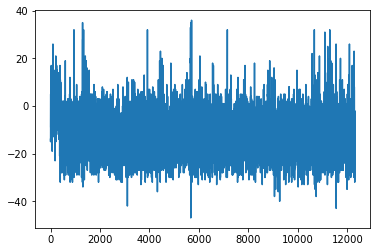

In [42]:
plt.plot(diff_arr[proband.index_diff_arr_start_of_mosaicism-3500:proband.index_diff_arr_end_of_mosaicism + 100000])

In [18]:
proband.phasable_snp_determiner(helper_functions.chromosome_filter(SNP_df, 16))
proband.t_test_snps(samp_size=int(config_elem["SAMPLE_SIZE"]), t_thres=float(config_elem["T_THRES"]))

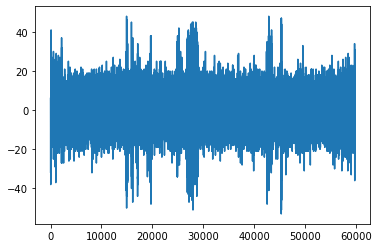

In [19]:
diff_arr = proband.dad_rd_array - proband.mom_rd_array
plt.plot(diff_arr)

98340
107147


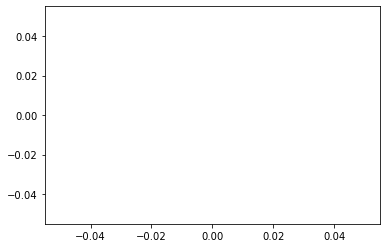

In [20]:
plt.plot(diff_arr[proband.index_diff_arr_start_of_mosaicism:proband.index_diff_arr_end_of_mosaicism])
print(proband.index_diff_arr_start_of_mosaicism)
print(proband.index_diff_arr_end_of_mosaicism)

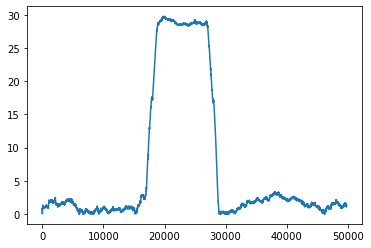

In [21]:
plt.plot(proband.t_values)